In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [2]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [3]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
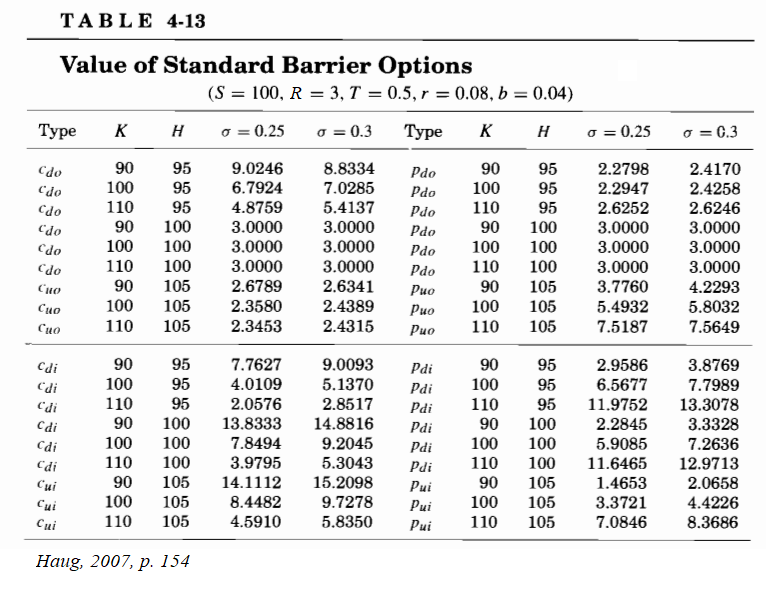

In [4]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [5]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

In [6]:
import numpy as np
import pandas as pd

# Определяем параметры для расчетов
S = 100  # Текущая цена актива
R = 3    # Компенсационная выплата
T = 0.5  # Время до экспирации (полгода)
r = 0.08 # Безрисковая ставка
b = 0.04 # Стоимость переноса позиции
sigma_values = [0.25, 0.3] # Волатильности
K_values = [90, 100, 110] # Страйк
H_values = [95, 100, 105] # Барьер

# Типы опционов
option_types = ['Cdo', 'Pdo', 'Cuo', 'Puo', 'Cdi', 'Pdi', 'Cui', 'Pui']

# Создаем таблицу для хранения результатов
results = []

# Функция для вычисления стоимости барьерного опциона
def calculate_option_value(option_type, S, H, K, R, T, r, b, sigma, is_call):
    return barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

# Перебираем все возможные комбинации
for K in K_values:
    for H in H_values:
        for sigma in sigma_values:
            for option_type in option_types:
                if 'C' in option_type:  # Колл-опционы
                    is_call = True
                else:  # Пут-опционы
                    is_call = False
                option_type = option_type[1].replace('d','Down').replace('u','Up')+'-and-' + option_type[2].replace('i','in').replace('o','out')
                # Вычисляем стоимость для каждого типа опциона
                option_value = calculate_option_value(option_type, S, H, K, R, T, r, b, sigma, is_call)
                
                # Добавляем результат в таблицу
                results.append([option_type, K, H, sigma, option_value])

# Преобразуем результаты в DataFrame для удобства
df = pd.DataFrame(results, columns=["Option Type", "K", "H", "Sigma", "Value"])

# Печатаем таблицу
df


,Option Type,K,H,Sigma,Value
0,Down-and-out,90,95,0.25,9.024568
1,Down-and-out,90,95,0.25,2.279838
2,Up-and-out,90,95,0.25,3.681457
3,Up-and-out,90,95,0.25,0.840847
4,Down-and-in,90,95,0.25,7.762670
...,...,...,...,...,...
139,Up-and-out,110,105,0.30,7.564957
140,Down-and-in,110,105,0.30,9.696779
141,Down-and-in,110,105,0.30,12.463006
142,Up-and-in,110,105,0.30,5.835036


# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

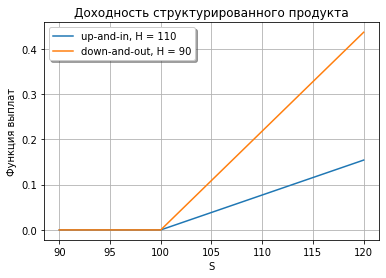

In [7]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

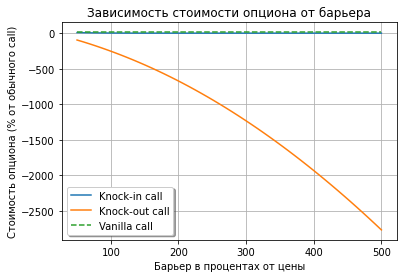

In [8]:
def vanilla_call(S0, K, T, r, sigma):
    """Функция для расчёта стоимости обычного call опциона по формуле Black-Scholes"""
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Расчёт стоимости барьерных опционов для различных барьеров
barriers = np.linspace(50, 500, 50)  # Барьер в процентах от цены
knock_in_prices = []
knock_out_prices = []
vanilla_prices = []

for H in barriers:
    H_percent = S0 * (1 + H / 100)
    knock_in_prices.append(barrier_option('Up-and-in', S0, H_percent, K_1, 0, T, r, b, sigma, True))
    knock_out_prices.append(barrier_option('Down-and-out', S0, H_percent, K_2, 0, T, r, b, sigma, True))
    vanilla_prices.append(vanilla_call(S0, K_1, T, r, sigma))

# Построение графиков
plt.plot(barriers, knock_in_prices, label='Knock-in call')
plt.plot(barriers, knock_out_prices, label='Knock-out call')
plt.plot(barriers, vanilla_prices, label='Vanilla call', linestyle='dashed')
plt.title('Зависимость стоимости опциона от барьера')
plt.xlabel('Барьер в процентах от цены')
plt.ylabel('Стоимость опциона (% от обычного call)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [14]:
import pandas as pd


# Пример создания исторических данных (в реальной задаче данные можно загрузить через API)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
data = {
    'date': dates,
    'close': np.random.rand(100) * 100 + 50,  # случайные цены закрытия
    'high': np.random.rand(100) * 100 + 55,   # случайные максимумы
    'low': np.random.rand(100) * 100 + 45     # случайные минимумы
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Пример вывода данных
df.head()


,close,high,low
date,,,
2023-01-01,120.157378,114.680066,97.491678
2023-01-02,147.093693,142.445347,85.613564
2023-01-03,73.002428,65.285641,60.812065
2023-01-04,72.846154,142.919218,124.566844
2023-01-05,122.611631,125.279986,60.200148


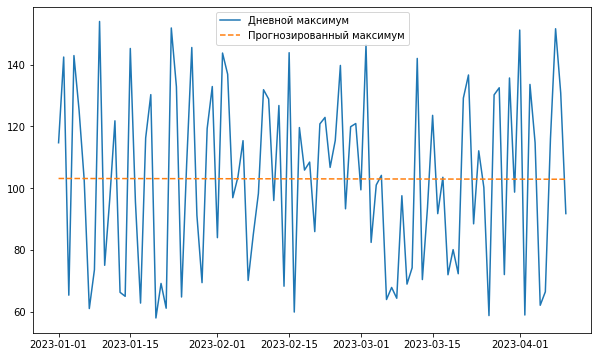

In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Подготовим данные для линейной регрессии
df['day'] = np.arange(len(df))

# Прогнозируем дневной максимум (например, через линейную регрессию)
X = df[['day']]  # независимая переменная - день
y_high = df['high']  # зависимая переменная - максимум

model_high = LinearRegression()
model_high.fit(X, y_high)

# Прогнозируем
df['high_pred'] = model_high.predict(X)

# Визуализация прогноза
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['high'], label='Дневной максимум')
plt.plot(df.index, df['high_pred'], label='Прогнозированный максимум', linestyle='--')
plt.legend()
plt.show()


In [16]:
# Установим цену триггера, например, это может быть цена страйка контракта.
strike_price = 75

# Генерируем сигналы на покупку
df['buy_signal'] = (df['high_pred'] >= strike_price).astype(int)

# Печатаем сигналы
df['buy_signal'].value_counts()


1    100
Name: buy_signal, dtype: int64

In [17]:
# Параметры стратегии
m = 3  # количество дней для активного сигнала
capital = 10000  # начальный капитал
position = 0  # текущее количество акций
cash = capital  # наличные средства
buy_price = 0  # цена покупки

# П&Л
pnl = []

# Симуляция торговли
for i in range(m, len(df)):
    # Если за последние m дней был сигнал на покупку
    if df['buy_signal'].iloc[i-m:i].sum() == m and position == 0:
        # Покупаем базовый актив
        buy_price = df['close'].iloc[i]
        position = cash // buy_price  # количество акций, которые можем купить
        cash -= position * buy_price  # списываем деньги

    # Закрытие позиции: если сигнал пропадает или истекает срок контракта
    elif df['buy_signal'].iloc[i-m:i].sum() < m and position > 0:
        # Продаем актив
        sell_price = df['close'].iloc[i]
        pnl.append(position * (sell_price - buy_price))  # прибыль/убыток от сделки
        cash += position * sell_price  # добавляем деньги от продажи
        position = 0  # сбрасываем позицию

# Финальный капитал
final_capital = cash + position * df['close'].iloc[-1]
total_pnl = final_capital - capital

print(f"Итоговая прибыль: {total_pnl}")


Итоговая прибыль: -2699.3236157852116


In [18]:
# Оценка с различными значениями m
results = []
for m in range(1, 11):
    capital = 10000  # начальный капитал
    position = 0
    cash = capital
    pnl = []
    
    for i in range(m, len(df)):
        if df['buy_signal'].iloc[i-m:i].sum() == m and position == 0:
            buy_price = df['close'].iloc[i]
            position = cash // buy_price
            cash -= position * buy_price
        elif df['buy_signal'].iloc[i-m:i].sum() < m and position > 0:
            sell_price = df['close'].iloc[i]
            pnl.append(position * (sell_price - buy_price))
            cash += position * sell_price
            position = 0
    
    final_capital = cash + position * df['close'].iloc[-1]
    total_pnl = final_capital - capital
    results.append((m, total_pnl))

# Печать результатов
for m, pnl in results:
    print(f"m = {m}, P&L = {pnl}")


m = 1, P&L = -6294.692284700309
m = 2, P&L = -2700.8737801465686
m = 3, P&L = -2699.3236157852116
m = 4, P&L = -5626.954071736841
m = 5, P&L = -4709.484209778353
m = 6, P&L = -2257.147397595523
m = 7, P&L = -2741.8998769515892
m = 8, P&L = -623.9322913416672
m = 9, P&L = -5080.608985599684
m = 10, P&L = -2124.1311904098275


# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [19]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [20]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
